# Mini Project 3

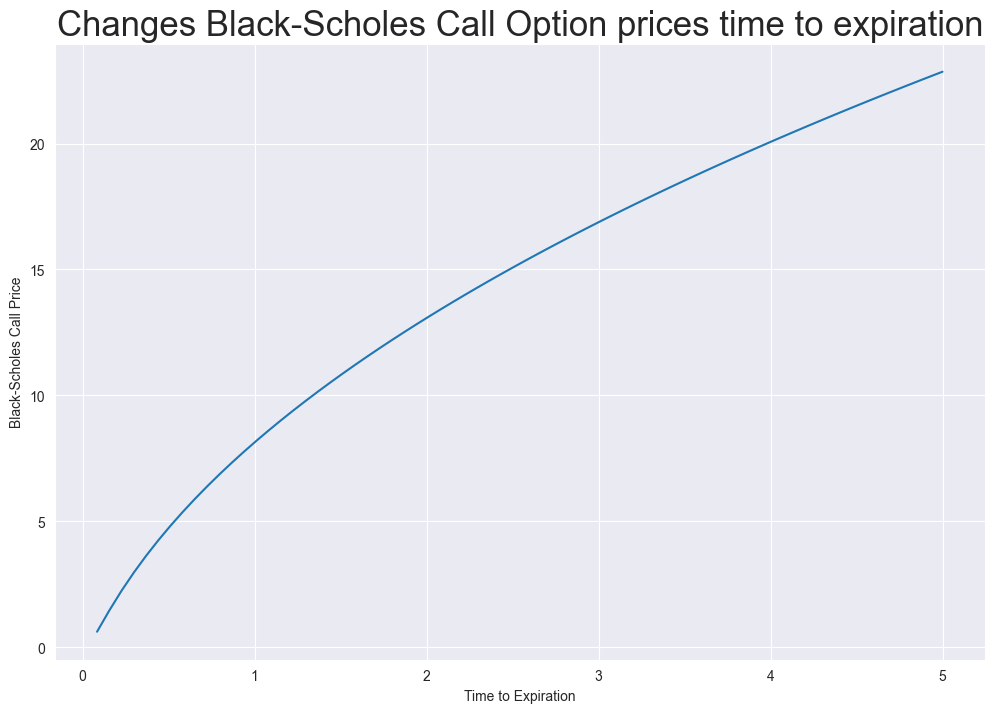

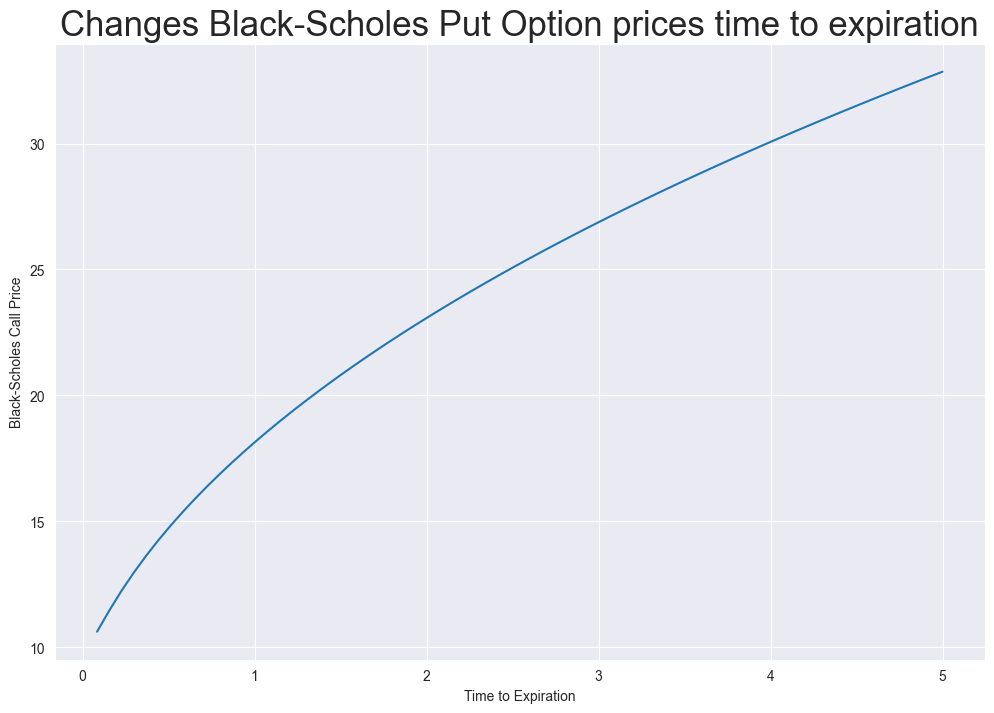

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)


S0 = 100
K = 110
sigma = .3
times = np.linspace(1/12, 5, 70)


call_prices = [bs_call(S0,K,sigma, t = times[i]) for i in range(len(times))]


plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Call Option prices time to expiration', size = 25)
plt.plot(times, call_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

put_prices = [bs_put(S0, K, sigma, t=t) for t in times]
plt.figure(figsize = (12,8))
plt.title('Changes Black-Scholes Put Option prices time to expiration', size = 25)
plt.plot(times, put_prices)
plt.xlabel('Time to Expiration')
plt.ylabel('Black-Scholes Call Price')
plt.show()

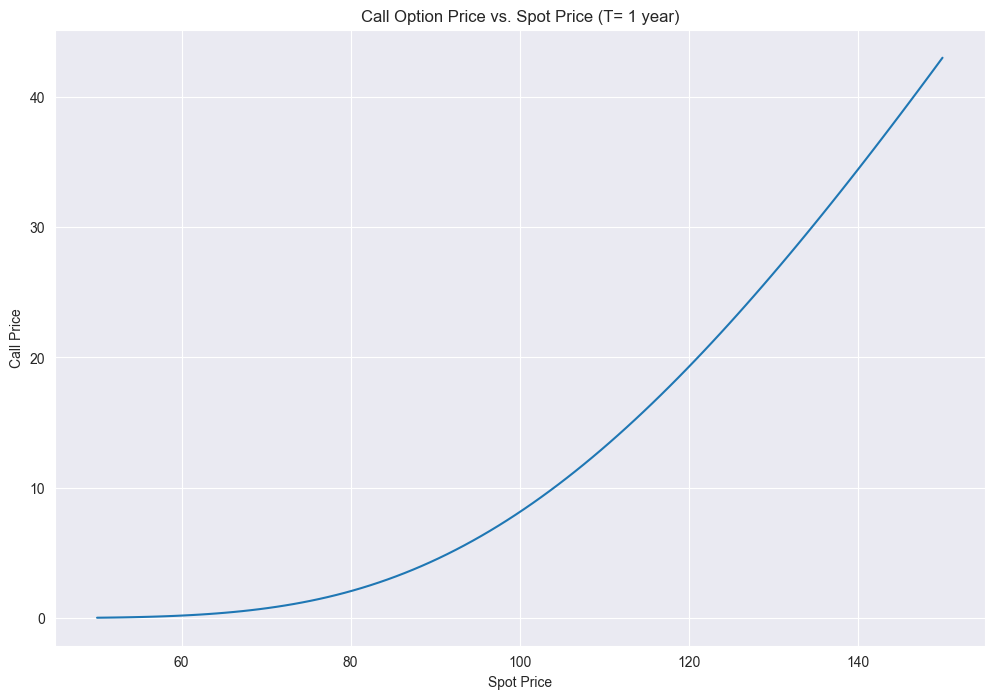

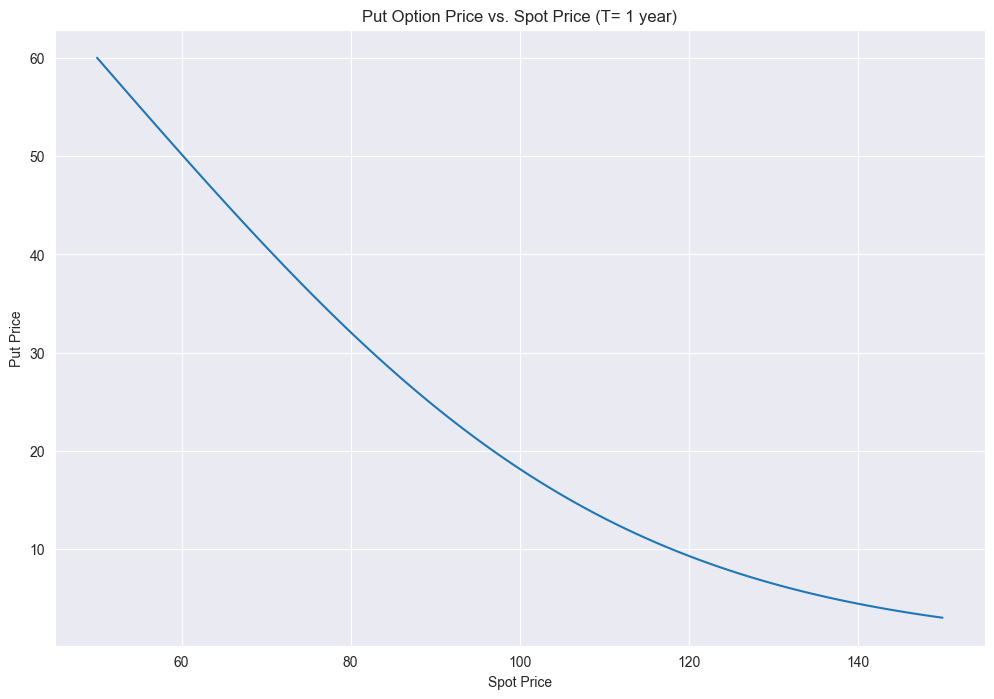

In [2]:
spot_prices = np.linspace(50, 150, 100)
call_prices_spot = [bs_call(S0 = s, K = K, sigma = sigma, t =1) for s in spot_prices]

plt.figure(figsize=(12,8))
plt.title('Call Option Price vs. Spot Price (T= 1 year)')
plt.plot(spot_prices, call_prices_spot)
plt.xlabel('Spot Price')
plt.ylabel('Call Price')
plt.grid(True)
plt.show()

spot_prices = np.linspace(50, 150, 100)
put_prices_spot = [bs_put(S0=s, K=K, sigma = sigma , t=1) for s in spot_prices]

plt.figure(figsize=(12,8))
plt.title('Put Option Price vs. Spot Price (T= 1 year)')
plt.plot(spot_prices, put_prices_spot)
plt.xlabel('Spot Price')
plt.ylabel('Put Price')
plt.grid(True)
plt.show()

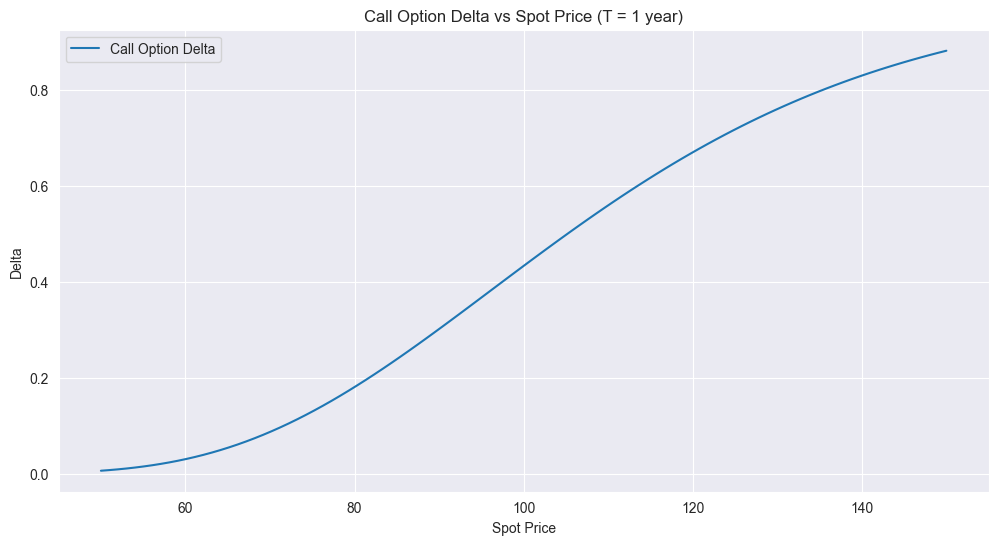

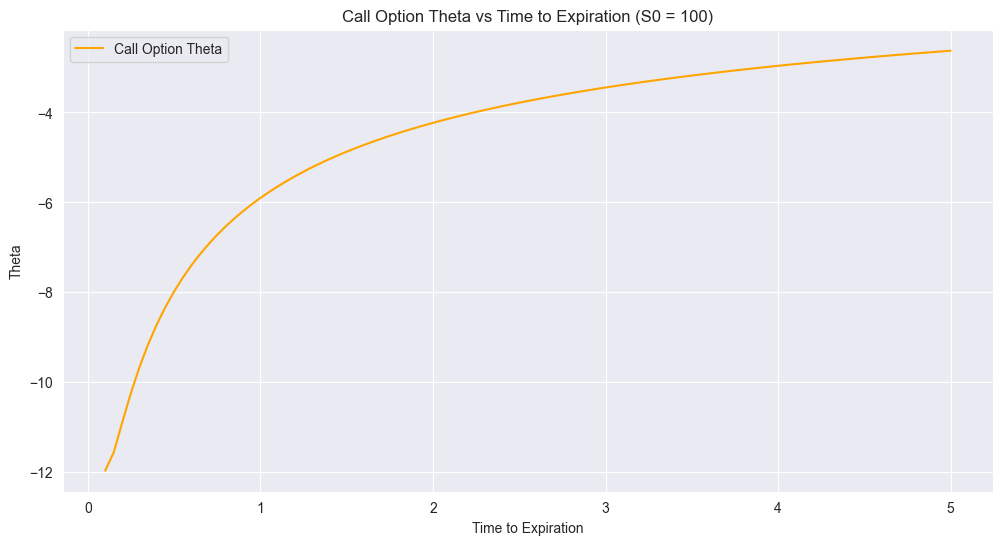

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Black-Scholes Call Option Formula
def bs_call(S0, K, sigma, t=1, r = 0):
    d1 = (np.log(S0/K)+(r+0.5*sigma**2)*t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return S0 * norm.cdf(1) - K * np.exp(-r*t) * norm.cdf(d2)

#Black-Scholes Delta for Call Option
def delta_call(S0, K, sigma, t = 1, r = 0):
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * t) / (sigma*np.sqrt(t))
    return norm.cdf(d1)

#Black-Scholes Theta for Call Option
def theta_call(S0, K, sigma, t = 1, r = 0):
    d1 = (np.log(S0/K) + (r+0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    term1 = - (S0 * norm.pdf(d1) * sigma) / (2 * np.sqrt(t))
    term2 = - r * K * np.exp(-r*t) * norm.cdf(d2)
    return term1 + term2

S0_values = np.linspace(50, 150, 100)
t_values = np.linspace(0.1, 5, 100)
K = 110
sigma = 0.3
r = 0

#Calculate delta
delta_vals = [delta_call(S0, K, sigma, t = 1, r = r) for S0 in S0_values]

#Calcualte Theta
theta_vals = [theta_call(S0 =100, K=K, sigma=sigma, t = t, r=r) for t in t_values]

# Plot Delta
plt.figure(figsize=(12, 6))
plt.plot(S0_values, delta_vals, label='Call Option Delta')
plt.title('Call Option Delta vs Spot Price (T = 1 year)')
plt.xlabel('Spot Price')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()
plt.show()

# Plot Theta
plt.figure(figsize=(12, 6))
plt.plot(t_values, theta_vals, label='Call Option Theta', color='orange')
plt.title('Call Option Theta vs Time to Expiration (S0 = 100)')
plt.xlabel('Time to Expiration')
plt.ylabel('Theta')
plt.grid(True)
plt.legend()
plt.show()

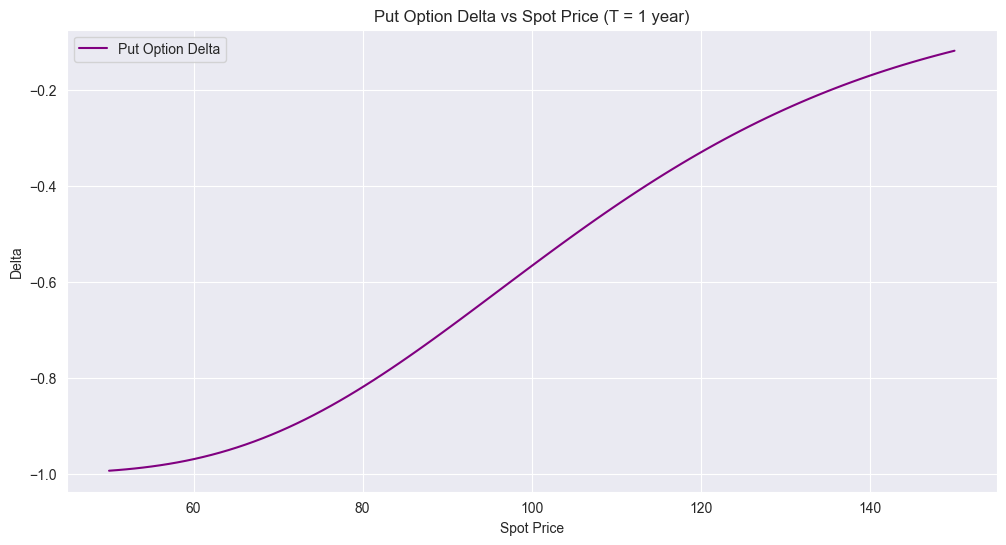

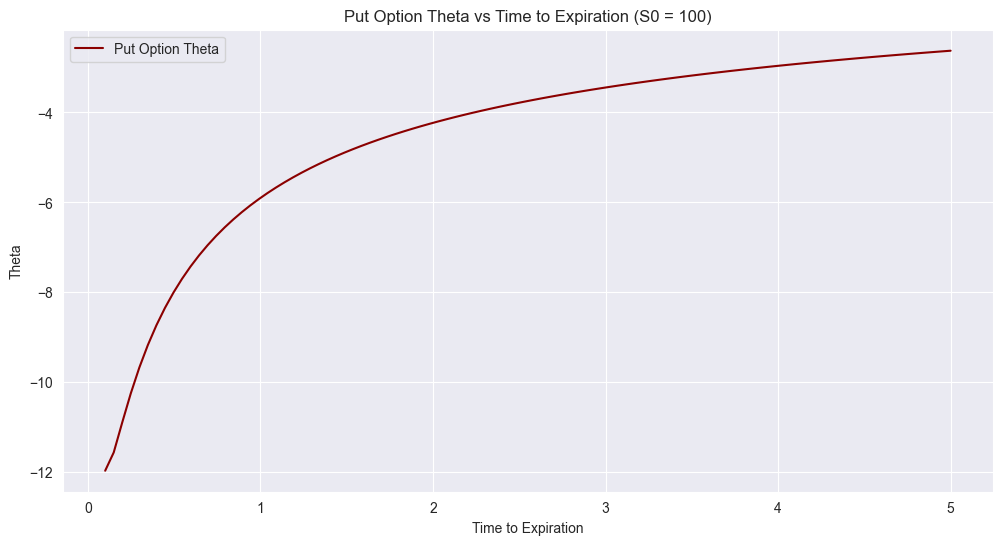

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Black-Scholes Put Option Formula (not required here but included for completeness)
def bs_put(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return -S0 * norm.cdf(-d1) + K * np.exp(-r * t) * norm.cdf(-d2)

# Put Delta
def delta_put(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    return norm.cdf(d1) - 1

# Put Theta
def theta_put(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    term1 = - (S0 * norm.pdf(d1) * sigma) / (2 * np.sqrt(t))
    term2 = r * K * np.exp(-r * t) * norm.cdf(-d2)
    return term1 + term2

# Parameters
S0_values = np.linspace(50, 150, 100)
t_values = np.linspace(0.1, 5, 100)
K = 110
sigma = 0.3
r = 0

# Calculate Delta and Theta for Put
put_deltas = [delta_put(S0, K, sigma, t=1, r=r) for S0 in S0_values]
put_thetas = [theta_put(S0=100, K=K, sigma=sigma, t=t, r=r) for t in t_values]

# Plot Delta
plt.figure(figsize=(12, 6))
plt.plot(S0_values, put_deltas, label='Put Option Delta', color='purple')
plt.title('Put Option Delta vs Spot Price (T = 1 year)')
plt.xlabel('Spot Price')
plt.ylabel('Delta')
plt.grid(True)
plt.legend()
plt.show()

# Plot Theta
plt.figure(figsize=(12, 6))
plt.plot(t_values, put_thetas, label='Put Option Theta', color='darkred')
plt.title('Put Option Theta vs Time to Expiration (S0 = 100)')
plt.xlabel('Time to Expiration')
plt.ylabel('Theta')
plt.grid(True)
plt.legend()
plt.show()
